<a href="https://colab.research.google.com/github/RV05/Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Sentiment_Analysis_Predicting_sentiment_of_COVID_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
message = pd.read_csv('/content/drive/MyDrive/alma/Coronavirus Tweets.csv',encoding='latin1')

message.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
message.shape

(41157, 6)

In [5]:
message['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [6]:
message.groupby('Sentiment').describe()

UserName                ... ScreenName         
                      count          mean  ...        75%      max
Sentiment                                  ...                    
Extremely Negative   5481.0  22983.268747  ...   78146.00  89904.0
Extremely Positive   6624.0  25043.485356  ...   80349.50  89902.0
Negative             9917.0  23907.040738  ...   78994.00  89907.0
Neutral              7713.0  24998.262025  ...   80244.00  89906.0
Positive            11422.0  24647.796183  ...   79927.75  89905.0

[5 rows x 16 columns]

In [7]:
message['length']=message['OriginalTweet'].apply(len)
message.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
message

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111


In [10]:
message['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

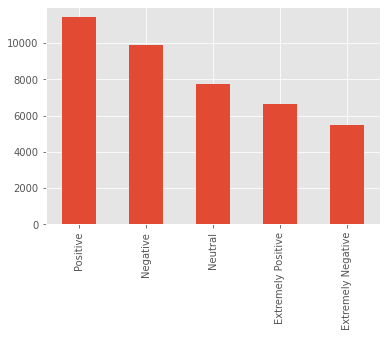

In [11]:
message['Sentiment'].value_counts().plot(kind='bar')

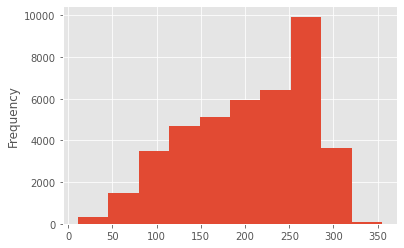

In [12]:
message['length'].plot(kind='hist')

In [13]:
message.length.describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: length, dtype: float64

In [15]:
message.Sentiment.replace({"Extremely Negative": 'Negative',"Extremely Positive": 'Positive'},inplace=True)

In [16]:
message.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [21]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [22]:
message.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310


In [23]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [24]:
message['tokenized_message'] = message['OriginalTweet'].apply(text_process)

In [25]:
message.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length,tokenized_message
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,111,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa httpstcoxX6ghGFzCC httpstcoI2NlzdxNo8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,237,advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,131,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID19 outbreak httpstcobInCA9Vp8P
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,306,food stock one empty PLEASE dont panic ENOUGH FOOD EVERYONE take need Stay calm stay safe COVID19france COVID19 COVID19 coronavirus confinement Confinementotal ConfinementGeneral httpstcozrlG0Z520j
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,310,ready go supermarket COVID19 outbreak Im paranoid food stock litteraly empty coronavirus serious thing please dont panic causes shortage CoronavirusFrance restezchezvous StayAtHome confinement httpstcousmuaLq72n


In [26]:
message.shape

(41157, 8)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['tokenized_message'])

In [29]:
X.toarray()[4560]

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print(vectorizer.get_feature_names())

['00', '000', '01', '03', '10', '100', '1000', '10000', '100000', '100k', '100s', '101', '10am', '10downingstreet', '10k', '10th', '11', '12', '120', '1200', '125', '13', '130', '14', '15', '150', '16', '17', '18', '1800', '18002199739', '18year', '19', '199', '1999', '19th', '1m', '1sanitizer', '1st', '20', '200', '2000', '2002', '2003', '2008', '200ml', '2014', '2015', '2016', '2018', '2019', '2019ncov', '2020', '2021', '20s', '21', '21daylockdown', '21dayslockdown', '22', '23', '24', '247', '25', '250', '2500', '25000', '25th', '26', '27', '28', '29', '2italy', '2k', '2m', '2nd', '2ply', '2pm', '2x', '30', '300', '3000', '30000', '31', '32', '33', '34', '35', '350', '3500', '35000', '35k', '36', '37', '38', '3d', '3m', '3ply', '3pm', '3rd', '3wuhan', '3x', '40', '400', '4000', '41', '42', '43', '44', '45', '46', '47', '48', '48hour', '49', '4pm', '4th', '50', '500', '5000', '50000', '500ml', '54', '55', '56', '57', '58', '5g', '5pm', '5th', '60', '600', '6000', '62', '64', '65', '66

In [31]:
len(vectorizer.get_feature_names())

6844

In [32]:
X.toarray().shape

(41157, 6844)

In [33]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [34]:
message.iloc[4065]['tokenized_message']

'least grocery store chains food companies audit products stocksell folks leaving products shelf time like food industry probably isnÂ\x92t calling coronavirus'

In [35]:
sum(X.toarray()[4065])

19

In [36]:
X.toarray()[4065]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
sum(X.toarray()[4560])

20

In [38]:
print(vectorizer.get_feature_names()[3671])
print(vectorizer.get_feature_names()[4560])

lying
powers


In [39]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['Sentiment'],test_size=0.2)

In [40]:
msg_train.head()

22143    Support food service workers Email American University Demand food service workers receive full pay health benefits laid COVID19 Write one httpstcojqeDcvrZc9                                                        
1851     someone risk category coronavirus Im currently concerned people panic buying rest us unable access food catching actual virus                                                                                        
16121    nucleargrrl hoodnaturalist CarolineSeydel mean deaths caused economic shutdown least degree magnitude larger deaths covid19 still like Deaths higher energy prices largely unnoticed de                              
25819    remaining open changes operations April limiting number customers time introducing online ordering making instore shopping experience safer Shop online httpstcolRwQCURAfH Read httpstco9HnqsxuDZx httpstcoFk5pf56D6N
26845    OnaziOgenyi Hello sir please maxwell name please sir bread winer family speak home bcs covid19 cant

In [41]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [42]:
train_vectorized

<32925x6844 sparse matrix of type '<class 'numpy.int64'>'
	with 501062 stored elements in Compressed Sparse Row format>

In [43]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [44]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [45]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
# Confusion matrices for train and test 

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[5227 6333  798]
 [  16 6129    4]
 [1552 8000 4866]]
[[1132 1555  353]
 [ 127 1328  109]
 [ 523 2034 1071]]


In [48]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

    Negative       0.77      0.42      0.55     12358
     Neutral       0.30      1.00      0.46      6149
    Positive       0.86      0.34      0.48     14418

    accuracy                           0.49     32925
   macro avg       0.64      0.59      0.50     32925
weighted avg       0.72      0.49      0.50     32925



              precision    recall  f1-score   support

    Negative       0.64      0.37      0.47      3040
     Neutral       0.27      0.85      0.41      1564
    Positive       0.70      0.30      0.42      3628

    accuracy                           0.43      8232
   macro avg       0.53      0.51      0.43      8232
weighted avg       0.59      0.43      0.43      8232



In [49]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(train_array,label_train)

In [50]:

train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [51]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[ 9515   985  1858]
 [  973  4004  1172]
 [ 1959  1075 11384]]
[[2185  289  566]
 [ 336  817  411]
 [ 623  327 2678]]


In [52]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77     12358
     Neutral       0.66      0.65      0.66      6149
    Positive       0.79      0.79      0.79     14418

    accuracy                           0.76     32925
   macro avg       0.74      0.74      0.74     32925
weighted avg       0.76      0.76      0.76     32925



              precision    recall  f1-score   support

    Negative       0.69      0.72      0.71      3040
     Neutral       0.57      0.52      0.55      1564
    Positive       0.73      0.74      0.74      3628

    accuracy                           0.69      8232
   macro avg       0.67      0.66      0.66      8232
weighted avg       0.69      0.69      0.69      8232



In [53]:
 from sklearn.naive_bayes import BernoulliNB
spam_detect_model = BernoulliNB().fit(train_array,label_train)

In [54]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [55]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[ 9154  1385  1819]
 [  645  4782   722]
 [ 1914  1498 11006]]
[[2110  394  536]
 [ 216 1075  273]
 [ 598  443 2587]]


In [56]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76     12358
     Neutral       0.62      0.78      0.69      6149
    Positive       0.81      0.76      0.79     14418

    accuracy                           0.76     32925
   macro avg       0.74      0.76      0.75     32925
weighted avg       0.77      0.76      0.76     32925



              precision    recall  f1-score   support

    Negative       0.72      0.69      0.71      3040
     Neutral       0.56      0.69      0.62      1564
    Positive       0.76      0.71      0.74      3628

    accuracy                           0.70      8232
   macro avg       0.68      0.70      0.69      8232
weighted avg       0.71      0.70      0.70      8232

